In [1]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns

In [2]:
# use pandas to import csv file
df = pd.read_csv("OnlineRetail4.csv")
# too see max columns
pd.set_option('display.max_columns',None)
# print dataframe
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,IsPromotion,Sex,Region
0,370859,44142.0,Remain,3,31/08/2023 13:21,28.08,95496,Australia,No,Female,South
1,455672,37036.0,Officer,19,18/11/2023 21:10,38.73,56057,Australia,Yes,Female,South
2,824795,69973.0,Program,11,03/07/2023 06:52,20.50,55855,Australia,No,Female,East
3,490051,96135.0,Simple,10,06/12/2023 10:04,46.28,34631,Canada,Yes,Female,South
4,549040,24211.0,Particularly,10,23/02/2024 15:18,7.54,46774,United Kingdom,Yes,Female,West
...,...,...,...,...,...,...,...,...,...,...,...
10045,861140,20472.0,Current,12,03/11/2023 17:16,16.49,68916,France,Yes,Male,West
10046,667156,38392.0,All,2,31/12/2023 09:24,16.28,91991,United Kingdom,No,Male,East
10047,550005,82248.0,Though,6,27/07/2023 05:04,33.38,89766,United States,No,Male,West
10048,982069,23938.0,Lawyer,14,10/10/2023 01:46,47.46,87345,Germany,No,Female,West


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    10050 non-null  int64  
 1   StockCode    9949 non-null   float64
 2   Description  10038 non-null  object 
 3   Quantity     10050 non-null  int64  
 4   InvoiceDate  10050 non-null  object 
 5   UnitPrice    10050 non-null  float64
 6   CustomerID   10050 non-null  int64  
 7   Country      10050 non-null  object 
 8   IsPromotion  10050 non-null  object 
 9   Sex          10050 non-null  object 
 10  Region       10050 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 863.8+ KB


In [4]:
#New dataframe 
new_df = df
#Checking for null values 
print(new_df.isnull().sum()) 
print("Missing values distribution: ")
print(new_df.isnull().mean())

InvoiceNo        0
StockCode      101
Description     12
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
IsPromotion      0
Sex              0
Region           0
dtype: int64
Missing values distribution: 
InvoiceNo      0.000000
StockCode      0.010050
Description    0.001194
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.000000
Country        0.000000
IsPromotion    0.000000
Sex            0.000000
Region         0.000000
dtype: float64


In [5]:
# #Checking for duplicates
print(new_df.duplicated().any()) 

True


In [6]:
print(new_df.duplicated())
print(new_df.shape) 

0        False
1        False
2        False
3        False
4        False
         ...  
10045    False
10046    False
10047    False
10048    False
10049    False
Length: 10050, dtype: bool
(10050, 11)


In [26]:
#Replacing string values with integer 
new_df["Sex"] = new_df["Sex"].replace({"Male":"1", "Female":"0"}) 
print(new_df.head())

   InvoiceNo  StockCode   Description  Quantity       InvoiceDate  UnitPrice  \
0     370859    44142.0        Remain         3  31/08/2023 13:21      28.08   
1     455672    37036.0       Officer        19  18/11/2023 21:10      38.73   
2     824795    69973.0       Program        11  03/07/2023 06:52      20.50   
3     490051    96135.0        Simple        10  06/12/2023 10:04      46.28   
4     549040    24211.0  Particularly        10  23/02/2024 15:18       7.54   

   CustomerID         Country IsPromotion Sex Region  
0       95496       Australia          No   0      3  
1       56057       Australia         Yes   0      3  
2       55855       Australia          No   0      0  
3       34631          Canada         Yes   0      3  
4       46774  United Kingdom         Yes   0      1  


In [27]:
#Finding unique values in "Region" 
print(new_df["Region"].unique()) 

[' 3' '0' '1' '2']


In [28]:
new_df['Region'] = new_df['Region'].replace({'East':'0', 'West':'1', 'North':'2', 'South':'3'})
print(new_df.head())

   InvoiceNo  StockCode   Description  Quantity       InvoiceDate  UnitPrice  \
0     370859    44142.0        Remain         3  31/08/2023 13:21      28.08   
1     455672    37036.0       Officer        19  18/11/2023 21:10      38.73   
2     824795    69973.0       Program        11  03/07/2023 06:52      20.50   
3     490051    96135.0        Simple        10  06/12/2023 10:04      46.28   
4     549040    24211.0  Particularly        10  23/02/2024 15:18       7.54   

   CustomerID         Country IsPromotion Sex Region  
0       95496       Australia          No   0      3  
1       56057       Australia         Yes   0      3  
2       55855       Australia          No   0      0  
3       34631          Canada         Yes   0      3  
4       46774  United Kingdom         Yes   0      1  


In [29]:
#Describing data after preprocessing 
print(new_df.shape) 
print(new_df.head())

(10050, 11)
   InvoiceNo  StockCode   Description  Quantity       InvoiceDate  UnitPrice  \
0     370859    44142.0        Remain         3  31/08/2023 13:21      28.08   
1     455672    37036.0       Officer        19  18/11/2023 21:10      38.73   
2     824795    69973.0       Program        11  03/07/2023 06:52      20.50   
3     490051    96135.0        Simple        10  06/12/2023 10:04      46.28   
4     549040    24211.0  Particularly        10  23/02/2024 15:18       7.54   

   CustomerID         Country IsPromotion Sex Region  
0       95496       Australia          No   0      3  
1       56057       Australia         Yes   0      3  
2       55855       Australia          No   0      0  
3       34631          Canada         Yes   0      3  
4       46774  United Kingdom         Yes   0      1  


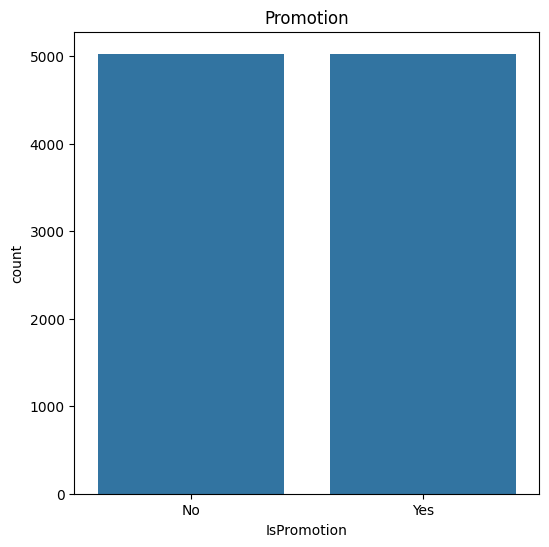

In [30]:
new_df.IsPromotion.value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='IsPromotion', data=new_df)
plt.title('Promotion')
plt.show()

In [31]:
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [32]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [33]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [34]:
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (700, 2)
Number transactions y_train dataset:  (700,)
Number transactions X_test dataset:  (300, 2)
Number transactions y_test dataset:  (300,)
